# Стохастический градиентный и координатный спуски

Для каждого задания указано количество баллов (если они оцениваются отдельно) + 1 балл за аккуратное и полное выполнение всего задания

## Загрузка и подготовка данных

In [1]:
import numpy as np #для матричных вычислений
import pandas as pd #для анализа и предобработки данных
import matplotlib.pyplot as plt #для визуализации
import seaborn as sns #для визуализации

**Загрузите уже знакомый вам файл *Advertising.csv* как объект DataFrame.** 

In [2]:
data = pd.read_csv('data/Advertising.csv', sep=',')
data

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


**Проверьте, есть ли в данных пропуски и, если они есть - удалите их**

In [3]:
#ваш код 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
#ваш код 
data = data.drop(['Unnamed: 0'],axis=1)

**Преобразуйте ваши признаки в массивы NumPy и разделите их на переменные X (предикторы) и y(целевая переменная)** 

In [5]:
#ваш код 
# Преобразуем признаки в массив NumPy
X = data.drop('sales',axis=1).values  # Предикторы
y = data['sales'].values  # Целевая переменная

## Координатный спуск (3 балла)

**Добавим единичный столбец для того, чтобы у нас был свободный коэффициент в уравнении регрессии:**

In [6]:
#ваш код 
X = np.hstack([np.ones(X.shape[0]).reshape(-1, 1), X])
y = y.reshape(-1, 1)
print(X.shape, y.shape)

(200, 4) (200, 1)


**Нормализуем данные: обычно это необходимо для корректной работы алгоритма**

In [7]:
#ваш код 
X = X / np.sqrt(np.sum(np.square(X), axis=0))

**Реализуйте алгоритм координатного спуска:** (3 балла)

Ниже приведен алгоритм координатного спуска для случая нормализованных данных:

**Задано:**

* $X=(x_{ij})$ - матрица наблюдений, размерностью $dim(X)=(m, n)$
* $N=1000$ - количество итераций

**Примечание:** *1000 итераций здесь указаны для этого задания, на самом деле их может быть намного больше, нет детерменированного значения.*

**Алгоритм (математическая запись):**
* Создать нулевой вектор параметров $w_0=(0, 0,..., 0)^T$
* Для всех $t=1, 2, ..., N$ итераций:
    * Для всех $k = 1, 2,..., n$:
        * Фиксируем значение всех признаков, кроме $k$-ого и вычисляем прогноз модели линейной регрессии.Для этого исключаем признак $k$-ый из данных и $w_j$ из параметров при построении прогноза.
        Математически это можно записать следующим образом:

        $$h_i = \sum_{j=1}^{k-1} x_{ij}w_{j} + \sum_{j=k+1}^{n} x_{ij}w_j $$

        **Примечание:**
        
        *Обратите, что в данной записи текущий признак под номером $k$ не участвует в сумме.Сравните эту запись с классической записью прогноза линейной регрессии в случае нормированных данных (когда участвуют все признаки):*

        $$h_i = \sum_{j=1}^{n} x_{ij}w_{j}$$ 
        
        * Вычисляем новое значение параметра $k$-ого коэффициента: 
        $$w_k = \sum_{i=1}^{m} x_{ik} (y_i - h_i) = x_k^T(y-h) $$

    * Вычисляем значение функции потерь и сохраняем в историю изменения функции потерь (В оценке функции потерь участвуют все признаки):
        $$\hat{y_i} = \sum_{j=1}^{n}x_{ij}w_j$$
        $$Loss_t = \frac{1}{n} \sum_{i=1}^{m}(y_i-\hat{y_i})^2$$
        
        или в векторном виде:
        
        $$\hat{y} = Xw$$
        $$Loss_t = \frac{1}{n}(y-\hat{y})^T(y-\hat{y})$$
    



**Алгоритм (псевдокод):**
```python

num_iters = #количество итераций
m = # количество строк в матрице X
n = # количество столбцов в матрице X
w = #вектор размера nx1, состояющий из нулей

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2)/(len(y))

```

Вам необходимо реализовать координатный спуск, и вывести веса в модели линейной регрессии.

In [8]:
# ваш код 
num_iters = 1000
m = X.shape[0]
n = X.shape[1]
w = np.zeros((n, 1))

for i in range(num_iters):
    for k in range(n):
        # Вычисляем прогноз без k-ого фактора
        h = (X[:,0:k] @ w[0:k]) + (X[:,k+1:] @ w[k+1:])
        # Обновляем новое значение k-ого коэффициента
        w[k] =  (X[:,k].T @ (y - h))
        # Вычисляем функцию потерь
        cost = sum((X @ w) - y) ** 2/(len(y))
       

In [9]:
print("Обученные веса:\n", w) 

Обученные веса:
 [[ 41.56217205]
 [110.13144155]
 [ 73.52860638]
 [ -0.55006384]]


Сравните результаты с реализацией линейной регрессии из библиотеки sklearn:

In [10]:
from sklearn.linear_model import LinearRegression
 
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
 
print(model.coef_)

[[ 41.56217205 110.13144155  73.52860638  -0.55006384]]


Если вы все сделали верно, они должны практически совпасть!

## Стохастический градиентный спуск (6 баллов)

**Отмасштабируйте столбцы исходной матрицы *X* (которую мы не нормализовали еще!). Для того, чтобы это сделать, надо вычесть из каждого значения среднее и разделить на стандартное отклонение** (0.5 баллов)

In [11]:
#ваш код
# Преобразуем признаки в массив NumPy
X = data.drop('sales',axis=1).values  # Предикторы

# Вычисляем среднее и стандартное отклонение по столбцам
means = np.mean(X, axis=0)  # Средние значения
stds = np.std(X, axis=0)    # Стандартные отклонения

# Масштабируем матрицу
X_scaled = (X - means) / stds

print("\nМасштабированная матрица X_scaled:")
print(X_scaled)



Масштабированная матрица X_scaled:
[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e

**Добавим единичный столбец**

In [12]:
X = np.hstack([np.ones(X_scaled.shape[0]).reshape(-1, 1), X_scaled])

**Создайте функцию mse_error для вычисления среднеквадратичной ошибки, принимающую два аргумента: реальные значения и предсказывающие, и возвращающую значение mse** (0.5 балла)

In [13]:
#ваш код
def mse_error(y, y_pred):
    mse = np.mean((y - y_pred) ** 2)
    return mse

**Сделайте наивный прогноз: предскажите продажи средним значением. После этого рассчитайте среднеквадратичную ошибку для этого прогноза** (0.5 балла)

In [14]:
#ваш код
# Наивный прогноз: предсказать среднее значение
y_pred = np.mean(y)  # Среднее значение

# Расчет MSE
mse = mse_error(y, y_pred)

# Вывод результатов
print("Среднее значение прогнозов:", y_pred)
print("Среднеквадратичная ошибка (MSE):", mse)

Среднее значение прогнозов: 14.0225
Среднеквадратичная ошибка (MSE): 27.085743750000002


**Создайте функцию *lin_pred*, которая может по матрице предикторов *X* и вектору весов линейной модели *w* получить вектор прогнозов** (0.5 балла)

In [15]:
#ваш код
def lin_pred(X, w):
    return X @ w

# обновим веса
w = np.linalg.inv(X.T @ X) @ X.T @ y

# проверяем
y_pred = lin_pred(X, w)
print(f'MSE: {mse_error(y, y_pred)}')

MSE: 2.784126314510936


**Создайте функцию *stoch_grad_step* для реализации шага стохастического градиентного спуска. (1.5 балла) 
Функция должна принимать на вход следующие аргументы:**
* матрицу *X*
* вектора *y* и *w*
* число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов
* число *$\eta$* (eta) - шаг градиентного спуска

Результатом будет вектор обновленных весов

Шаг для стохастического градиентного спуска выглядит следующим образом:

$$\Large w_j \leftarrow w_j - \frac{2\eta}{\ell} \sum_{i=1}^\ell{{x_{ij}((w_0 + w_1x_{i1} + w_2x_{i2} +  w_3x_{i3}) - y_i)}}$$

Для того, чтобы написать функцию, нужно сделать следующее:
    
*  посчитать направление изменения: умножить объект обучающей выборки на 2 и на разницу между предсказанным значением и реальным, а потом поделить на количество элементов в выборке.
* вернуть разницу между вектором весов и направлением изменения, умноженным на шаг градиентного спуска

In [16]:
#ваш код
def stoch_grad_step(X, y, w, train_ind, eta):
    
    # Получаем признаки и целевое значение для train_ind
    x_i = X[train_ind].reshape(1, -1)  # Строка с признаками (размер 1 x n)
    y_i = y[train_ind] # Соответствующее целевое значение (размер 1 x 1)

    # Вычисляем предсказание для train_ind
    y_pred = x_i @ w # Скалярное произведение строки признаков и вектора весов

    # Градиент ошибки для выбранного объекта
    gradient = -2 * x_i.T @ (y_i - y_pred)

    # Обновляем веса
    w_updated = w - eta * gradient

    return w_updated



**Создайте функцию *stochastic_gradient_descent*, для реализации стохастического градиентного спуска (2.5 балла)**

**Функция принимает на вход следующие аргументы:**
- Матрицу признаков X
- Целевую переменнную
- Изначальную точку (веса модели)
- Параметр, определяющий темп обучения
- Максимальное число итераций
- Евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,при котором алгоритм прекращает работу 

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $w$, а также вектор (список) ошибок.**

Алгоритм сследующий:
    
* Инициализируйте расстояние между векторами весов на соседних итерациях большим числом (можно бесконечностью)
* Создайте пустой список для фиксации ошибок
* Создайте счетчик итераций
* Реализуйте оновной цикл обучения пока расстояние между векторами весов больше того, при котором надо прекратить работу (когда расстояния станут слишком маленькими - значит, мы застряли в одном месте) и количество итераций меньше максимально разрешенного: сгенерируйте случайный индекс, запишите текущую ошибку в вектор ошибок, запишите в переменную текущий шаг стохастического спуска с использованием функции, написанной ранее. Далее рассчитайте текущее расстояние между векторами весов и прибавьте к счетчику итераций 1.
* Верните вектор весов и вектор ошибок

In [17]:
# ваш код
def stochastic_gradient_descent(X, y, w_init, eta, max_iter, tol):
    # Инициализация
    w = w_init.copy()  # Копируем начальные веса
    distance = np.inf  # Начальное расстояние между весами
    errors = []  # Список для хранения ошибок
    iter_count = 0  # Счетчик итераций

    while distance > tol and iter_count < max_iter:
        # Случайный индекс обучающего примера
        train_ind = np.random.randint(X.shape[0])
        
        # Вычисляем предсказания для всей матрицы
        y_pred = X @ w
        
        # Вычисляем текущую ошибку (MSE)
        mse = np.mean((y - y_pred) ** 2)
        errors.append(mse)
        
        # Сохраняем старый вектор весов
        w_old = w.copy()
        
        # Выполняем шаг стохастического градиентного спуска
        w = stoch_grad_step(X, y, w, train_ind, eta)
        
        # Вычисляем расстояние между весами
        distance = np.linalg.norm(w - w_old)
        
        # Увеличиваем счетчик итераций
        iter_count += 1

    return w, errors


In [18]:
# Запускаем стохастический градиентный спуск
w_final, errors = stochastic_gradient_descent(X, y, np.zeros((4, 1)) , 0.01, 10**5, 1e-6)

# Вывод результатов
print("Итоговый вектор весов:")
print(w_final)

Итоговый вектор весов:
[[14.16488308]
 [ 3.70562555]
 [ 2.90345072]
 [ 0.38630284]]


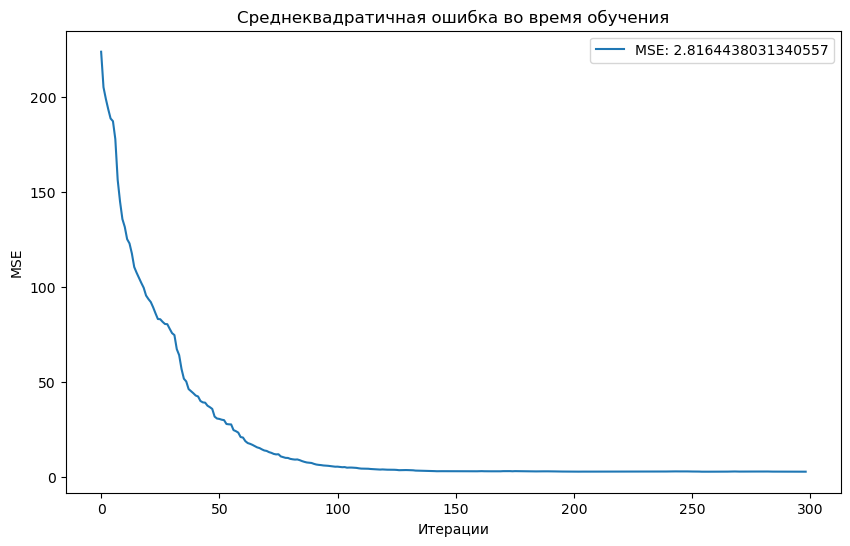

In [41]:
w_final, errors = stochastic_gradient_descent(X, y, np.zeros((4, 1)) , 
                                              eta=0.01, 
                                              max_iter=10**5, 
                                              tol=1e-4)

plt.figure(figsize=(10, 6))
plt.plot(errors, label=f"MSE: {errors[-1]}")
plt.title("Среднеквадратичная ошибка во время обучения")
plt.xlabel("Итерации")
plt.ylabel("MSE")
plt.legend()
plt.show()

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов, состоящий из нулей. Можете поэкспериментировать с параметром, отвечающим за темп обучения.**

**Постройте график зависимости ошибки от номера итерации**

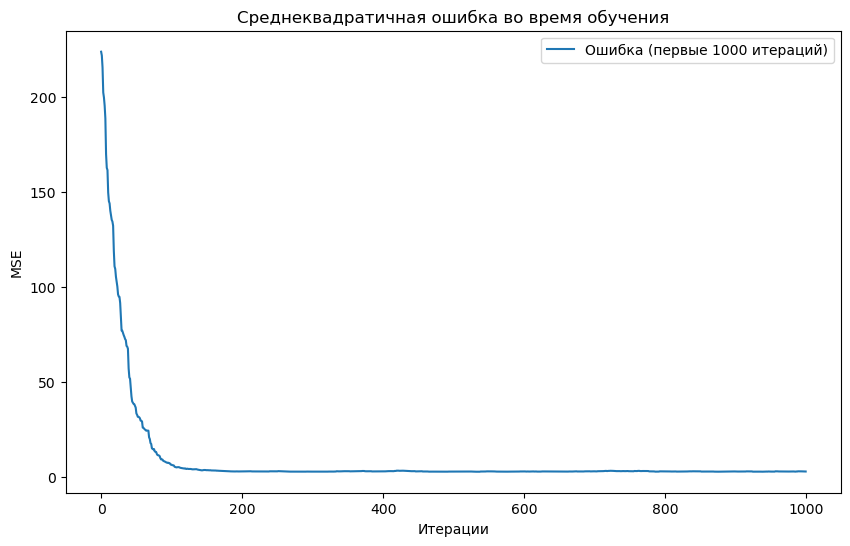

In [19]:
# ваш код
# Построение графика ошибки
plt.figure(figsize=(10, 6))
plt.plot(errors[:1000], label="Ошибка (первые 1000 итераций)")
plt.title("Среднеквадратичная ошибка во время обучения")
plt.xlabel("Итерации")
plt.ylabel("MSE")
plt.legend()
plt.show()

**Выведите вектор весов, к которому сошелся метод.**

In [20]:
# ваш код
print("Итоговый вектор весов:")
print(w_final)

Итоговый вектор весов:
[[14.16488308]
 [ 3.70562555]
 [ 2.90345072]
 [ 0.38630284]]


**Выведите среднеквадратичную ошибку на последней итерации.**

In [21]:
# ваш код
mse_last = errors[-1]
mse_last

3.0493427411795992